In [2]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk import FreqDist
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import os.path
import gensim 
from gensim import corpora
from gensim.models import LsiModel
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from gensim.models.coherencemodel import CoherenceModel
import collections


articles_df = pd.read_json('trainingDocs.json')


content = articles_df['text']
ids = articles_df['Id']
test = content.head()
words = []
for row in content:
    row.strip()
    words.append(row)

test_list = ' '.join(words)

toeknized = word_tokenize(test_list)
stop_words = list(stopwords.words("english"))
extra = ['said','one','would','also','get','may','two','like','could',',','.',':','(',')',';','include','includes','&','and/or','limited']

for i in extra:
    stop_words.append(i)
filtered_list = []

for word in toeknized:
    if word.casefold() not in stop_words:
        filtered_list.append(word)
    


lemmatizer = WordNetLemmatizer()


final_tweets = [lemmatizer.lemmatize(word) for word in filtered_list]


frequency_distribution = FreqDist(final_tweets)


# Annoy 

import sys
import annoy
import gensim
import gensim.similarities 
from gensim.similarities.annoy import AnnoyIndexer
from gensim.models.word2vec import Word2Vec
import os
import collections
import smart_open
import random
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import smart_open

def read_corpus(fname, tokens_only=False):
    count=0
    for doc in content:
        count+=1
        tokens = gensim.utils.simple_preprocess(doc)
        if tokens_only:
            yield tokens
        else:
            # For training data, add tags
            yield gensim.models.doc2vec.TaggedDocument(tokens, [count])

train_corpus = list(read_corpus(content))
test_corpus = list(read_corpus(content, tokens_only=True))

model = gensim.models.doc2vec.Doc2Vec(vector_size=100, min_count=2, epochs=20)
model.build_vocab(train_corpus)

print(f"Word 'artificial' appeared {model.wv.get_vecattr('artificial', 'count')} times in the training corpus.")

model.train(train_corpus, total_examples=model.corpus_count, epochs=model.epochs)

# Note that infer_vector() takes a list of string tokens

ranks = []
second_ranks = []
for doc_id in range(len(train_corpus)):
    inferred_vector = model.infer_vector(train_corpus[doc_id].words)
    sims = model.dv.most_similar([inferred_vector], topn=len(model.dv))
    rank = [docid for docid, sim in sims].index(doc_id)
    ranks.append(rank)

    second_ranks.append(sims[1])
    
print("\n")
print(content[0])


Word 'artificial' appeared 15 times in the training corpus.


Methods and approaches to ensure that the DoD maintains access to advanced and legacy integrated circuit (IC) technology nodes through the implementation of assurance technologies embedded within an IC, beyond functional analysis of consumed third party intellectual property (soft, hard, and semi) and cloud technologies. All R&D activities in this topic area would contribute to a holistic assurance approach to protect the DoD's microelectronics supply chain as IC's are designed and/or replaced. Examples include (but are not limited to):Innovative design techniques that promote assurance, Technologies that provide traceability throughout the IC lifecycle, Cloud environments and ecosystems to enable provenance, IP analysis and verification environments to perform beyond functional analysis, Development & demonstration of qualitative & quantitative metrics for this topic area


In [59]:
# Create annoy indexer 

import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

from gensim import similarities
import gensim.similarities 
from annoy import AnnoyIndex
import numpy as np

# 100 trees are being used 
#Model is doc2vec model
annoy_index = AnnoyIndexer(model,100)

# Derive the vector for the first doc in our model

print(train_corpus[0])
inferred_vector = model.infer_vector(train_corpus[0].words)
print(inferred_vector)
    

annoyVector = np.array(inferred_vector)
print(annoyVector)


print("\n")
#Results for original doc2Vec model
print(model.dv.most_similar([inferred_vector], topn=10))
doc2vec_result = model.dv.most_similar([inferred_vector], topn=10)
for result in doc2vec_result:
    print(result)

    
print("\n")
# The instance of AnnoyIndexer we just created is passed 
approximate_neighbors = model.dv.most_similar([annoyVector], topn=10, indexer=annoy_index)
# Print the approximate_neighbors and their corresponding cosine similarity values
for neighbor in approximate_neighbors:
    print(neighbor)
    
   
print("\n")
print(train_corpus[77])
print("\n")
print(train_corpus[20])
print("\n")
print(train_corpus[62])

TaggedDocument(['methods', 'and', 'approaches', 'to', 'ensure', 'that', 'the', 'dod', 'maintains', 'access', 'to', 'advanced', 'and', 'legacy', 'integrated', 'circuit', 'ic', 'technology', 'nodes', 'through', 'the', 'implementation', 'of', 'assurance', 'technologies', 'embedded', 'within', 'an', 'ic', 'beyond', 'functional', 'analysis', 'of', 'consumed', 'third', 'party', 'intellectual', 'property', 'soft', 'hard', 'and', 'semi', 'and', 'cloud', 'technologies', 'all', 'activities', 'in', 'this', 'topic', 'area', 'would', 'contribute', 'to', 'holistic', 'assurance', 'approach', 'to', 'protect', 'the', 'dod', 'supply', 'chain', 'as', 'ic', 'are', 'designed', 'and', 'or', 'replaced', 'examples', 'include', 'but', 'are', 'not', 'limited', 'to', 'innovative', 'design', 'techniques', 'that', 'promote', 'assurance', 'technologies', 'that', 'provide', 'traceability', 'throughout', 'the', 'ic', 'lifecycle', 'cloud', 'environments', 'and', 'ecosystems', 'to', 'enable', 'provenance', 'ip', 'analy

In [56]:
# Results for doc 5

print(train_corpus[5])
inferred_vector = model.infer_vector(train_corpus[5].words)
print(inferred_vector)
annoyVector = np.array(inferred_vector)
print(annoyVector)

print("\n")
#Results for original doc2Vec model
print(model.dv.most_similar([inferred_vector], topn=5))
doc2vec_result = model.dv.most_similar([inferred_vector], topn=5)
for result in doc2vec_result:
    print(result)

    
print("\n")
# The instance of AnnoyIndexer we just created is passed 
approximate_neighbors = model.dv.most_similar([annoyVector], topn=5, indexer=annoy_index)
# Print the approximate_neighbors and their corresponding cosine similarity values
for neighbor in approximate_neighbors:
    print(neighbor)
    
   
print("\n")
print("Text for top 5 most similar documents:")
print("\n")
print("Doc 11:")

print(content[11])
print("\n")
print("Doc 10:")

print(content[10])
print("\n")
print("Doc 12:")

print(content[12])
print("\n")
print("Doc 9:")

print(content[9])
print("\n")

print("Doc 8: ")

print(content[8])
print("\n")

TaggedDocument(['develop', 'novel', 'mechanisms', 'to', 'provide', 'traceability', 'threat', 'or', 'risk', 'data', 'associated', 'with', 'commercial', 'off', 'the', 'shelf', 'cots', 'devices', 'areas', 'of', 'interest', 'include', 'but', 'are', 'not', 'limited', 'to', 'application', 'of', 'machine', 'learning', 'ml', 'and', 'or', 'artificial', 'intelligence', 'ai', 'techniques', 'to', 'model', 'just', 'in', 'time', 'supply', 'line', 'disruptions', 'chain', 'of', 'custody', 'verification', 'techniques', 'market', 'analysis', 'studies', 'of', 'semiconductor', 'sub', 'sectors', 'nondestructive', 'advanced', 'counterfeit', 'and', 'cloned', 'identification', 'techniques', 'mechanism', 'to', 'determine', 'the', 'effectiveness', 'of', 'threat', 'countermeasures', 'and', 'or', 'vulnerability', 'mitigation', 'techniques', 'across', 'integrated', 'circuit', 'design', 'photomask', 'fabrication', 'packaging', 'test', 'assembly', 'and', 'warehousing', 'other', 'novel', 'supply', 'chain', 'security'

In [31]:
# Results for doc 37

print(train_corpus[37])
inferred_vector = model.infer_vector(train_corpus[37].words)
print(inferred_vector)
annoyVector = np.array(inferred_vector)
print(annoyVector)

print("\n")
#Results for original doc2Vec model
print(model.dv.most_similar([inferred_vector], topn=5))
doc2vec_result = model.dv.most_similar([inferred_vector], topn=5)
for result in doc2vec_result:
    print(result)

    
print("\n")
# The instance of AnnoyIndexer we just created is passed 
approximate_neighbors = model.dv.most_similar([annoyVector], topn=5, indexer=annoy_index)
# Print the approximate_neighbors and their corresponding cosine similarity values
for neighbor in approximate_neighbors:
    print(neighbor)
    
   
print("\n")
print("Text for top 5 most similar documents:")
print("\n")
print("Doc 73:")

print(content[73])
print("\n")
print("Doc 37:")

print(content[37])
print("\n")
print("Doc 16:")

print(content[16])
print("\n")
print("Doc 72:")

print(content[72])
print("\n")

print("Doc 64: ")

print(content[64])
print("\n")

TaggedDocument(['provide', 'decisive', 'mission', 'capabilities', 'and', 'reliable', 'space', 'services', 'to', 'enable', 'the', 'joint', 'warfighter', 'to', 'control', 'the', 'space', 'domain', 'and', 'exploit', 'it', 'to', 'support', 'control', 'of', 'other', 'domains', 'mission', 'capabilities', 'supplies', 'and', 'space', 'services', 'of', 'interest', 'include', 'space', 'based', 'sensing', 'technologies', 'to', 'detect', 'track', 'characterize', 'and', 'warn', 'of', 'rapidly', 'evolving', 'emerging', 'threats', 'battlespace', 'awareness', 'ionospheric', 'specification', 'forecast', 'and', 'modification', 'techniques', 'to', 'improve', 'radar', 'and', 'communication', 'systems', 'performance', 'by', 'exploiting', 'environmental', 'conditions', 'space', 'communication', 'hardware', 'antennas', 'feed', 'networks', 'transmitters', 'receivers', 'amplifier', 'electronics', 'signal', 'processing', 'etc', 'software', 'and', 'networks', 'to', 'enable', 'access', 'to', 'new', 'band', 'width

In [32]:
# Results for doc 72

print(train_corpus[72])
inferred_vector = model.infer_vector(train_corpus[72].words)
print(inferred_vector)
annoyVector = np.array(inferred_vector)
print(annoyVector)

print("\n")
#Results for original doc2Vec model
print(model.dv.most_similar([inferred_vector], topn=5))
doc2vec_result = model.dv.most_similar([inferred_vector], topn=5)
for result in doc2vec_result:
    print(result)

    
print("\n")
# The instance of AnnoyIndexer we just created is passed 
approximate_neighbors = model.dv.most_similar([annoyVector], topn=5, indexer=annoy_index)
# Print the approximate_neighbors and their corresponding cosine similarity values
for neighbor in approximate_neighbors:
    print(neighbor)
    
   
print("\n")
print("Text for top 5 most similar documents:")
print("\n")
print("Doc 73:")

print(content[73])
print("\n")
print("Doc 72:")

print(content[72])
print("\n")
print("Doc 37:")

print(content[37])
print("\n")
print("Doc 36:")

print(content[36])
print("\n")

print("Doc 69: ")

print(content[69])
print("\n")

TaggedDocument(['enhance', 'core', 'spacecraft', 'components', 'and', 'subsystems', 'to', 'enable', 'game', 'changing', 'improvements', 'in', 'agility', 'resilience', 'affordability', 'and', 'performance', 'for', 'dod', 'spacecraft', 'specific', 'areas', 'of', 'technology', 'being', 'sought', 'include', 'large', 'deployable', 'structures', 'and', 'apertures', 'thermal', 'control', 'systems', 'integrated', 'structural', 'sensing', 'resilient', 'materials', 'and', 'structures', 'agile', 'manufacturing', 'power', 'generation', 'distribution', 'management', 'and', 'storage', 'command', 'and', 'data', 'handling', 'including', 'networking', 'within', 'and', 'between', 'spacecraft', 'survivable', 'and', 'cyber', 'resistant', 'space', 'flight', 'electronics', 'guidance', 'navigation', 'and', 'control', 'agile', 'maneuver', 'and', 'autonomy', 'in', 'addition', 'innovative', 'technologies', 'that', 'enable', 'logistics', 'support', 'to', 'space', 'operations', 'are', 'being', 'sought', 'such', '

In [49]:
LOGS = True  # Set to True if you want to see progress in logs.
if LOGS:
    import logging
    logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
import matplotlib.pyplot as plt
    
# Set up the model and vector that we are using in the comparison
annoy_index = AnnoyIndexer(model, 100)

# Dry run to make sure both indexes are fully in RAM
normed_vectors = model.dv.get_normed_vectors()
vector = normed_vectors[0]
model.dv.most_similar([vector], topn=10, indexer=annoy_index)
model.dv.most_similar([vector], topn=10)
dv=model.dv
print(len(dv))
print(len(normed_vectors))

import time
import numpy as np

def avg_query_time(annoy_index=None, queries=1000):
    """Average query time of a most_similar method over 1000 random queries."""
    total_time = 0
    for _ in range(queries):
        rand_vec = normed_vectors[np.random.randint(0, len(dv))]
        start_time = time.process_time()
        model.dv.most_similar([rand_vec], topn=5, indexer=annoy_index)
        total_time += time.process_time() - start_time
    return total_time / queries

queries = 1000

gensim_time = avg_query_time(queries=queries)
annoy_time = avg_query_time(annoy_index, queries=queries)
print("Gensim (s/query):\t{0:.5f}".format(gensim_time))
print("Annoy (s/query):\t{0:.5f}".format(annoy_time))
speed_improvement = gensim_time / annoy_time
print ("\nAnnoy is {0:.2f} times faster on average on this particular run".format(speed_improvement))

101
101
Gensim (s/query):	0.00006
Annoy (s/query):	0.00004

Annoy is 1.46 times faster on average on this particular run


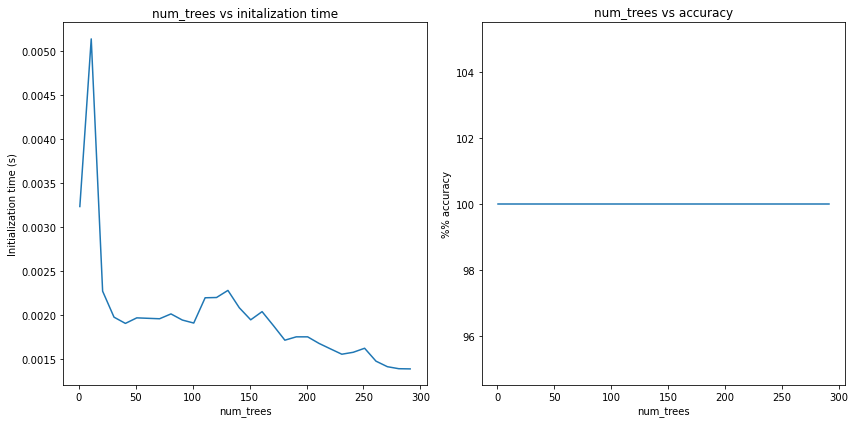

In [55]:
# Num trees vs accuracy 

import matplotlib.pyplot as plt

# Create data set of initialization times and accuracy
# Compute Doc2Vec results 

exact_results = [element[0] for element in model.dv.most_similar([normed_vectors[0]], topn=100)]

x_values = []
y_values_init = []
y_values_accuracy = []

# Testing 1 - 300 trees 

for x in range(1, 300, 10):
    x_values.append(x)
    start_time = time.time()
    annoy_index = AnnoyIndexer(model, x)
    y_values_init.append(time.time() - start_time)
    # Compute Annoy reults
    approximate_results = model.dv.most_similar([normed_vectors[0]], topn=100, indexer=annoy_index)
    top_words = [result[0] for result in approximate_results]
    # Compare Doc2Vec and Annoy results 
    y_values_accuracy.append(len(set(top_words).intersection(exact_results)))
    
# Plot results 

plt.figure(1, figsize=(12, 6))
plt.subplot(121)
plt.plot(x_values, y_values_init)
plt.title("num_trees vs initalization time")
plt.ylabel("Initialization time (s)")
plt.xlabel("num_trees")
plt.subplot(122)
plt.plot(x_values, y_values_accuracy)
plt.title("num_trees vs accuracy")
plt.ylabel("%% accuracy")
plt.xlabel("num_trees")
plt.tight_layout()
plt.show()